<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/2348507_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customer_data = pd.read_csv('/content/customer_support_tickets.csv')
customer_data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [ ]:
customer_data.info()

In [50]:
customer_data.shape

(8469, 17)

In [ ]:
customer_data.isnull().sum

Segregating customer's age into different groups using binning

In [52]:
customer_data = {'Customer Age': [22,28,31,37,42,47,53,60] }
df = pd.DataFrame(customer_data)

In [53]:
bin_edges = [18,25,35,40,45,50,100]

Bin labels


In [54]:
bin_labels = ['18-25','25-35','35-40','40-45','45-50','50+']

In [55]:
df['age_group'] = pd.cut(df['Customer Age'], bins=bin_edges, labels=bin_labels, right=False)

In [57]:
print(df)

   Customer Age age_group
0            22     18-25
1            28     25-35
2            31     25-35
3            37     35-40
4            42     40-45
5            47     45-50
6            53       50+
7            60       50+


Using barplot displaying the distribution of customers across different age groups

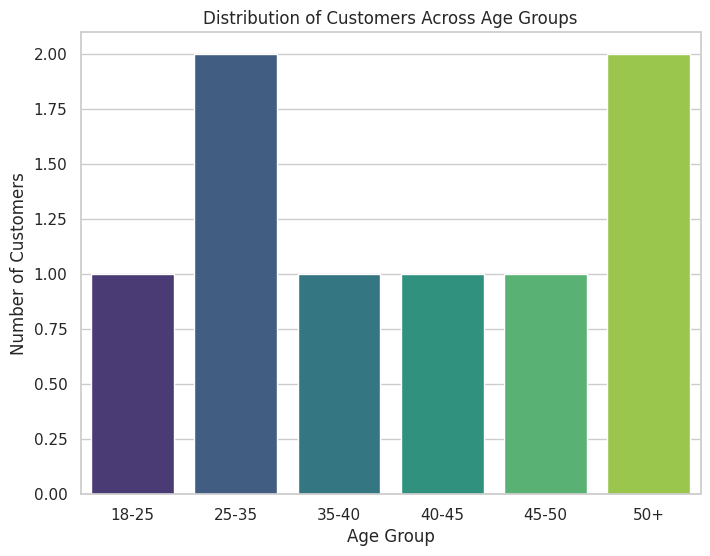

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='age_group', data=df, order=bin_labels, palette="viridis")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers Across Age Groups")
plt.show()

Analysing different type of tickets related with ticket status by performing One Hot encoding to convert categorical data to numerical data

In [59]:
customer_data = {'Ticket Type': ['Technical Issue', 'Billing inquiry', 'Cancellation request', 'Product inquiry', 'Billing inquiry'],
        'Ticket Status': ['Open', 'Closed', 'Open', 'Pending', 'Closed']}
df = pd.DataFrame(customer_data)

encoded_df = pd.get_dummies(df, columns=['Ticket Type', 'Ticket Status'], prefix=['Type', 'Status'])

print(encoded_df)

   Type_Billing inquiry  Type_Cancellation request  Type_Product inquiry  \
0                     0                          0                     0   
1                     1                          0                     0   
2                     0                          1                     0   
3                     0                          0                     1   
4                     1                          0                     0   

   Type_Technical Issue  Status_Closed  Status_Open  Status_Pending  
0                     1              0            1               0  
1                     0              1            0               0  
2                     0              0            1               0  
3                     0              0            0               1  
4                     0              1            0               0  


Exploring relationship between these categorical variables

In [60]:
from scipy.stats import chi2_contingency

In [61]:
relationship_categorical = pd.crosstab(customer_data['Ticket Type'],customer_data['Ticket Status'])
chi2,p,dof,expected = chi2_contingency(relationship_categorical)
print(f"P value for ticket type and ticket status : {p}")

P value for ticket type and ticket status : 0.12465201948308108


Since p value 0.12465201948308108 is greater than the significance level we can declare there is no strong relationship between ticket type and ticket status

Finding the relationship between numerical variables Customer Age, Customer Satisfaction Rating using covariance matrix

In [71]:
data = {'age': [22, 28, 31, 37, 42, 47, 53, 60],
        'product_rating': [4.5, 3.8, 4.2, 4.0, 4.7, 3.5, 4.8, 4.2]}
correlation = customer_data['Customer Age'].corr(customer_data['Customer Satisfaction Rating'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.003700385787743807
